# Ermittle Wegstrecken für Wochentage 

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df = pd.read_csv(r"C:\Users\thoma\Desktop\ev-modelling-repo\Data\NHTS_trips_processed.csv")

In [3]:
df.head()

,ID,ST_WOTAG,WHYFROM,zweck,W_NR,TRPTRANS,wegkm,wegmin_imp1,W_SZ,W_AZ,W_SZ_MIN,W_AZ_MIN,W_SZ_t
0,300000071,1,1,4,1,3,8.439,15,1000,1015,600,615,40
1,300000071,1,4,1,2,3,8.286,20,1510,1530,910,930,61
2,300000072,1,2,1,1,6,135.191,120,700,900,420,540,28
3,300000072,1,1,2,2,6,131.367,150,1800,2030,1080,1230,72
4,300000073,1,1,2,1,3,3.621,15,845,900,525,540,35


## Nur Wege betrachten die mit durch EV substituierbarem Fahrzeug zurückgelegt wurden
Trip Mode derived = TRPTRANS \
3 = Car \
4 = SUV \
5 = Van \
6 = Pickup truck \

In [4]:
filt = (df["TRPTRANS"] > 2) & (df["TRPTRANS"] < 7)
df = df[filt]

## Filtern nach Werktagen und Wegstrecke > 0

In [5]:
filt = (df["ST_WOTAG"] < 6) & (df["wegkm"] > 0.0)
data = df[filt]

In [6]:
data.head()

,ID,ST_WOTAG,WHYFROM,zweck,W_NR,TRPTRANS,wegkm,wegmin_imp1,W_SZ,W_AZ,W_SZ_MIN,W_AZ_MIN,W_SZ_t
0,300000071,1,1,4,1,3,8.439,15,1000,1015,600,615,40
1,300000071,1,4,1,2,3,8.286,20,1510,1530,910,930,61
2,300000072,1,2,1,1,6,135.191,120,700,900,420,540,28
3,300000072,1,1,2,2,6,131.367,150,1800,2030,1080,1230,72
4,300000073,1,1,2,1,3,3.621,15,845,900,525,540,35


## Filtern Start "Zuhause" = 1 Ziel "Arbeit" = 2 

In [9]:
filt = (data["WHYFROM"] == 1) & (data["zweck"] == 2)
weg_zuhause_arbeit = list(data[filt]["wegkm"])

[(-10, 100)]

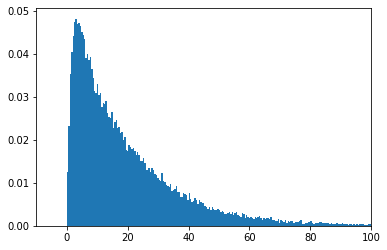

In [13]:
plt.figure()
ax = plt.gca()
plt.hist(weg_zuhause_arbeit, bins=10000, density=True);
ax.set(xlim=(-10, 100))

# Lognormalverteilung

In [14]:
shape, loc, scale = stats.lognorm.fit(weg_zuhause_arbeit, floc=0 )

In [15]:
x = np.linspace(0, 1000, 1000)

In [16]:
pdf = stats.lognorm.pdf(x, s=shape, loc=0, scale=scale )

[(-10, 100)]

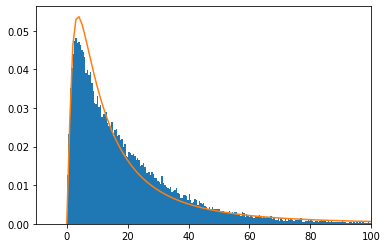

In [25]:
plt.figure()
ax = plt.gca()
plt.hist(weg_zuhause_arbeit, bins=10000, density=True);
plt.plot(x, pdf)
ax.set(xlim=(-10, 100))

In [18]:
shape2, loc2, scale2 = stats.lognorm.fit(weg_zuhause_arbeit2, floc=0 )

In [19]:
pdf2 = stats.lognorm.pdf(x, s=shape2, loc=0, scale=scale2 )

[(-10, 100)]

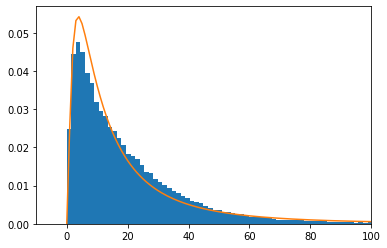

In [20]:
plt.figure()
ax = plt.gca()
plt.hist(weg_zuhause_arbeit2, bins=100, density=True);
plt.plot(x, pdf2)
ax.set(xlim=(-10, 100))

# Gamma Verteilung

In [21]:
gamma_alpha, gamma_loc, gamma_beta = stats.gamma.fit(weg_zuhause_arbeit, floc=0)

In [22]:
pdf_gamma = stats.gamma.pdf(x, gamma_alpha, gamma_loc, gamma_beta)

[(-10, 100)]

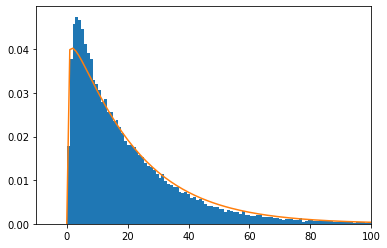

In [23]:
plt.figure()
ax = plt.gca()
plt.hist(weg_zuhause_arbeit, bins=5000, density=True);
plt.plot(x, pdf_gamma)
ax.set(xlim=(-10, 100))